In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [2]:
train = pd.read_csv('train.csv')
train.drop(['ID'], axis=1, inplace=True)
train

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [3]:
test = pd.read_csv('test.csv')
test.drop(['ID'], axis=1, inplace=True)
test

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [4]:
categorical = [var for var in train.columns if train[var].dtype == 'O']
print('범주형 컬럼:',categorical)

numerical = [var for var in train.columns if train[var].dtype != 'O']
print("숫자형 컬럼:", numerical)

범주형 컬럼: ['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']
숫자형 컬럼: ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']


In [5]:
for var in train[categorical]:
    print(train[var].value_counts() / np.float(len(train)))

 36 months    0.669606
 60 months    0.330394
Name: 대출기간, dtype: float64
10+ years    0.328006
2 years      0.087752
< 1 year     0.080732
3 years      0.078728
1 year       0.064895
Unknown      0.058893
5 years      0.058830
4 years      0.058031
8 years      0.050761
6 years      0.040231
7 years      0.039608
9 years      0.038881
10+years     0.009305
<1 year      0.003842
3            0.000924
1 years      0.000582
Name: 근로기간, dtype: float64
MORTGAGE    0.497788
RENT        0.391561
OWN         0.110640
ANY         0.000010
Name: 주택소유상태, dtype: float64
부채 통합     0.572725
신용 카드     0.254429
주택 개선     0.063971
기타        0.049068
주요 구매     0.018724
의료        0.010790
자동차       0.008277
소규모 사업    0.008173
이사        0.005255
휴가        0.004839
주택        0.003126
재생 에너지    0.000623
Name: 대출목적, dtype: float64
B    0.299261
C    0.286861
A    0.174175
D    0.138679
E    0.076370
F    0.020292
G    0.004362
Name: 대출등급, dtype: float64


<ipython-input-5-64a1766485ea>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts() / np.float(len(train)))


In [6]:
for var in train[categorical]:
    print(var,"contains",train[var].unique())

대출기간 contains [' 36 months' ' 60 months']
근로기간 contains ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태 contains ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적 contains ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']
대출등급 contains ['C' 'B' 'A' 'D' 'F' 'G' 'E']


In [7]:
train.replace({'근로기간' : '<1 year'}, '< 1 year', inplace=True)
train.replace({'근로기간' : '10+years'}, '10+ years', inplace=True)
train.replace({'근로기간' : '1 years'}, '1 year', inplace=True)
train.replace({'근로기간' : '3'}, '3 years', inplace=True)

train.replace({'근로기간' : 'Unknown'}, np.NaN, inplace=True)

In [8]:
def simple_imputation(df, column_name):
    # 결측치가 있는 열을 선택
    missing_values = df[column_name].isnull()
    
    # 결측치가 아닌 값들의 확률 분포 계산
    non_missing_values = df.loc[~missing_values, column_name]
    probabilities = non_missing_values.value_counts(normalize=True)
    
    # 결측치 대체
    imputed_values = np.random.choice(probabilities.index, size=missing_values.sum(), p=probabilities.values)
    
    # 대체된 값으로 결측치 채우기
    df.loc[missing_values, column_name] = imputed_values
    
    return df


# 단순 확률 대치법 적용
column_to_impute = '근로기간'
df = simple_imputation(train, column_to_impute)

# 결과 출력
print(df)

           대출금액        대출기간       근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
0      12480000   36 months    6 years      RENT   72000000        18.90   
1      14400000   60 months  10+ years  MORTGAGE  130800000        22.33   
2      12000000   36 months    5 years  MORTGAGE   96000000         8.60   
3      14400000   36 months    8 years  MORTGAGE  132000000        15.09   
4      18000000   60 months  10+ years      RENT   71736000        25.39   
...         ...         ...        ...       ...        ...          ...   
96289  14400000   36 months  10+ years  MORTGAGE  210000000         9.33   
96290  28800000   60 months  10+ years  MORTGAGE  132000000         5.16   
96291  14400000   36 months     1 year  MORTGAGE   84000000        11.24   
96292  15600000   36 months    5 years  MORTGAGE   66330000        17.30   
96293   8640000   36 months  10+ years      RENT   50400000        11.80   

       총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        15  부

In [9]:
train.isnull().sum()

대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [10]:
train

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,10+ years,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [80]:
loan_due = pd.DataFrame(train.groupby('대출등급')['대출기간'].value_counts().reset_index(name='count'))
loan_due


,대출등급,대출기간,count
0,A,36 months,15952
1,A,60 months,820
2,B,36 months,22883
3,B,60 months,5934
4,C,36 months,16935
5,C,60 months,10688
6,D,60 months,6869
7,D,36 months,6485
8,E,60 months,5459
9,E,36 months,1895


In [12]:
object_data=train.select_dtypes(['object'])
object_data

,대출기간,근로기간,주택소유상태,대출목적,대출등급
0,36 months,6 years,RENT,부채 통합,C
1,60 months,10+ years,MORTGAGE,주택 개선,B
2,36 months,5 years,MORTGAGE,부채 통합,A
3,36 months,8 years,MORTGAGE,부채 통합,C
4,60 months,10+ years,RENT,주요 구매,B
...,...,...,...,...,...
96289,36 months,10+ years,MORTGAGE,신용 카드,C
96290,60 months,10+ years,MORTGAGE,주택 개선,E
96291,36 months,1 year,MORTGAGE,신용 카드,A
96292,36 months,5 years,MORTGAGE,부채 통합,D


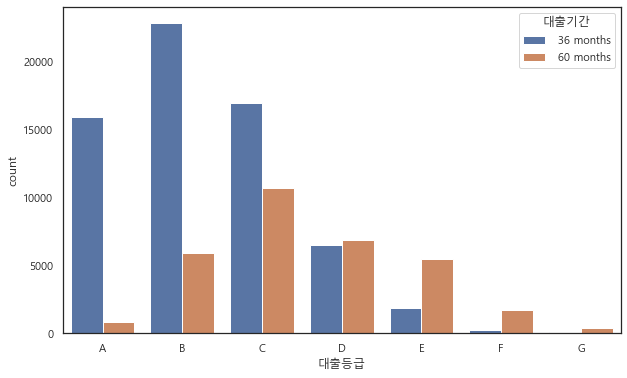

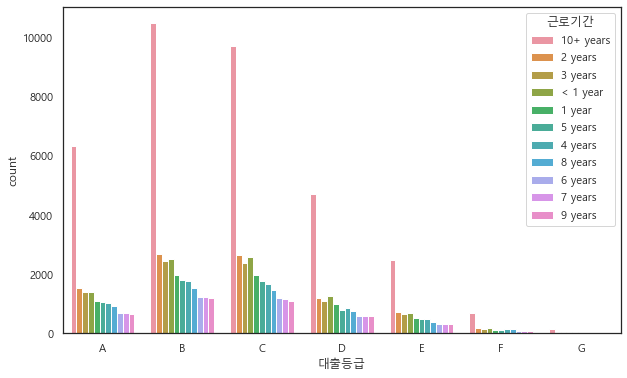

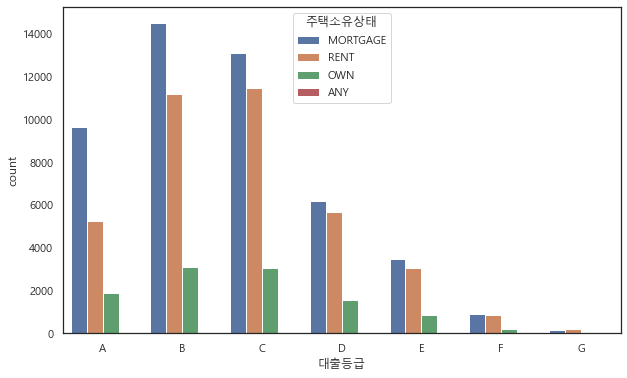

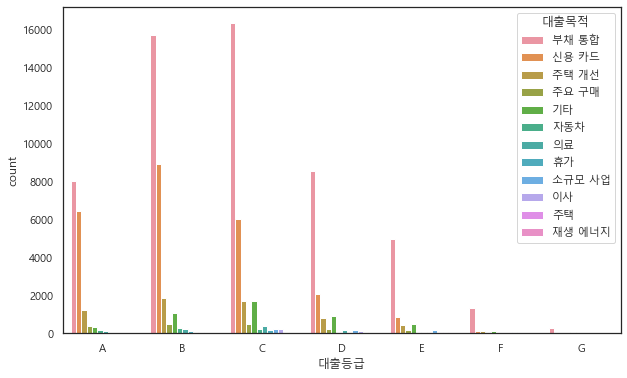

In [13]:
for var in train[categorical]:
    if var != '대출등급':
        count_data = train[categorical].groupby(['대출등급'])[var].value_counts().reset_index(name='count')
        
        plt.figure(figsize=(10,6))
        sns.barplot(x='대출등급', y='count', data=count_data, hue=var)

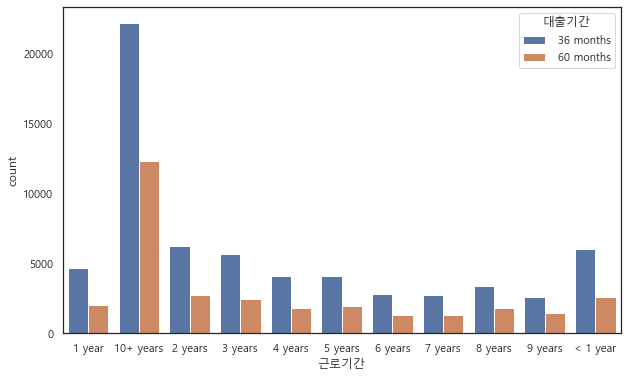

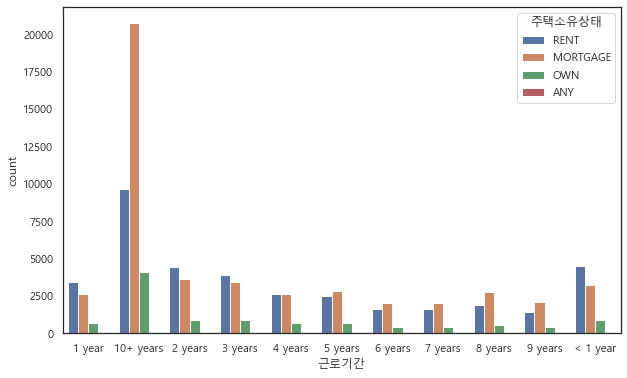

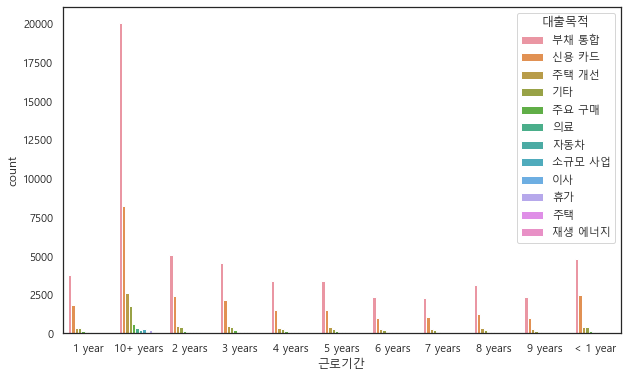

In [14]:
for var in train[categorical]:
    if var != '근로기간' and var != '대출등급':
        eda = train[categorical].groupby(['근로기간'])[var].value_counts().reset_index(name='count')
        
        plt.figure(figsize=(10,6))
        sns.barplot(x='근로기간', y='count', data=eda, hue=var)

  대출등급          대출금액
0    A  1.790579e+07
1    B  1.686808e+07
2    C  1.789004e+07
3    D  1.953331e+07
4    E  2.232013e+07
5    F  2.400517e+07
6    G  2.402079e+07


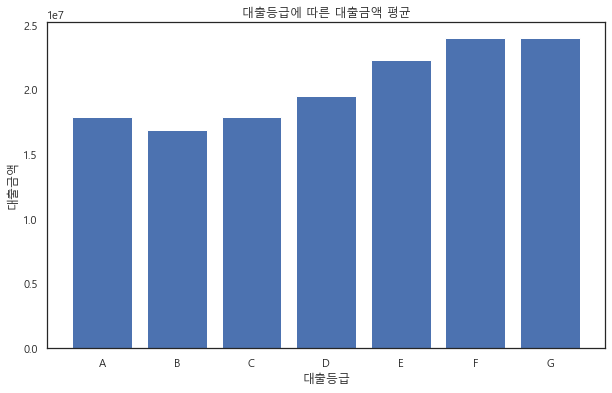

  대출등급          연간소득
0    A  1.124911e+08
1    B  9.570640e+07
2    C  8.903804e+07
3    D  8.359673e+07
4    E  8.492864e+07
5    F  8.434506e+07
6    G  8.258034e+07


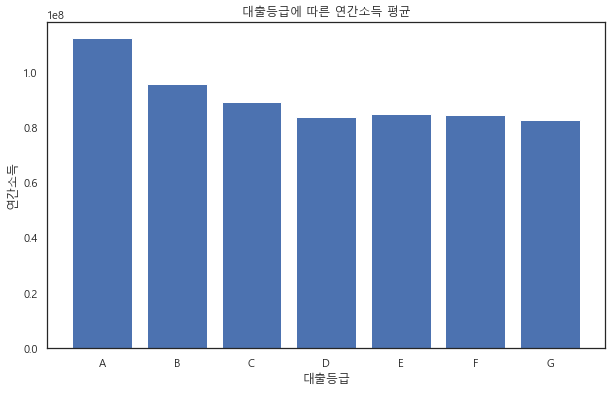

  대출등급  부채_대비_소득_비율
0    A    16.547850
1    B    18.129529
2    C    20.270095
3    D    21.808465
4    E    22.248466
5    F    21.853710
6    G    20.691952


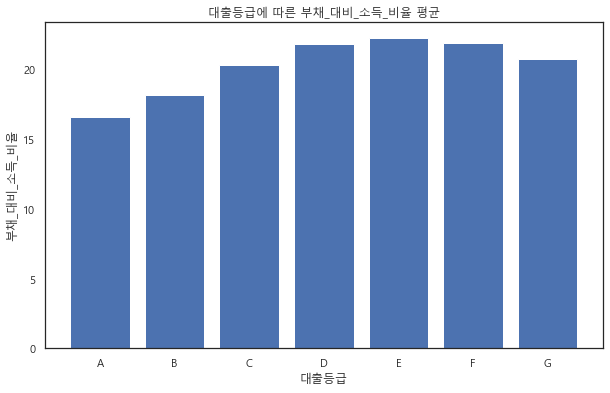

  대출등급       총계좌수
0    A  26.910684
1    B  25.223375
2    C  24.695073
3    D  24.705107
4    E  25.320642
5    F  25.543501
6    G  24.550000


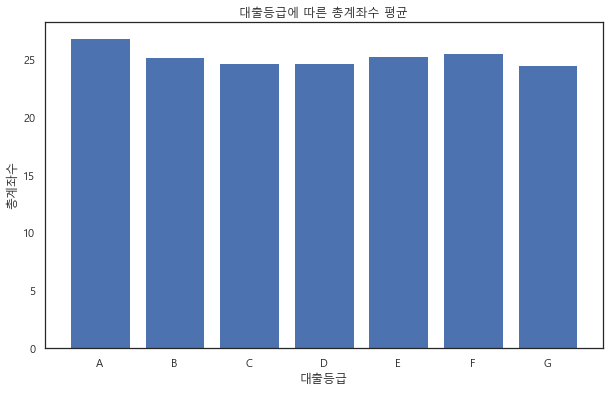

  대출등급  최근_2년간_연체_횟수
0    A      0.218698
1    B      0.365409
2    C      0.380299
3    D      0.384379
4    E      0.349334
5    F      0.361822
6    G      0.416667


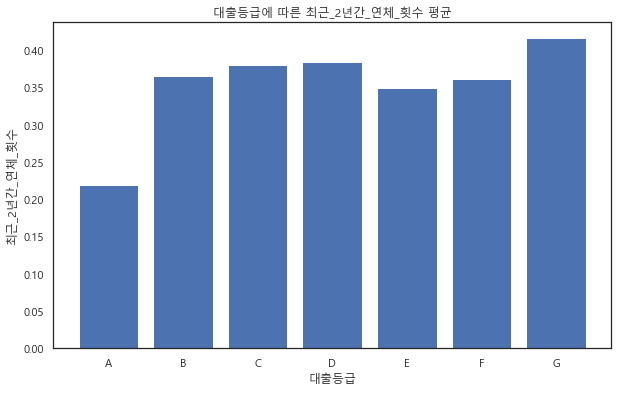

  대출등급         총상환원금
0    A  1.066966e+06
1    B  8.340144e+05
2    C  7.521078e+05
3    D  7.297173e+05
4    E  7.074507e+05
5    F  6.673177e+05
6    G  5.870190e+05


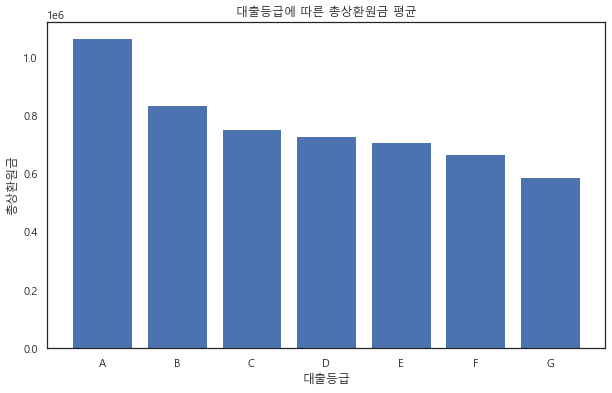

  대출등급         총상환이자
0    A  2.240085e+05
1    B  3.033410e+05
2    C  4.306745e+05
3    D  6.117896e+05
4    E  8.146975e+05
5    F  1.095274e+06
6    G  1.284655e+06


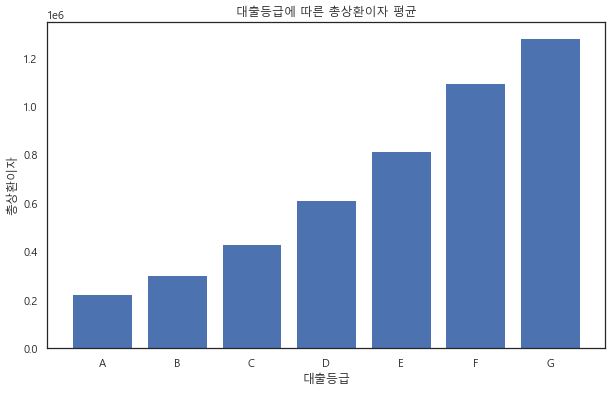

  대출등급       총연체금액
0    A   14.806105
1    B   29.441371
2    C   48.052565
3    D  113.352104
4    E   94.572206
5    F  237.801433
6    G  329.942857


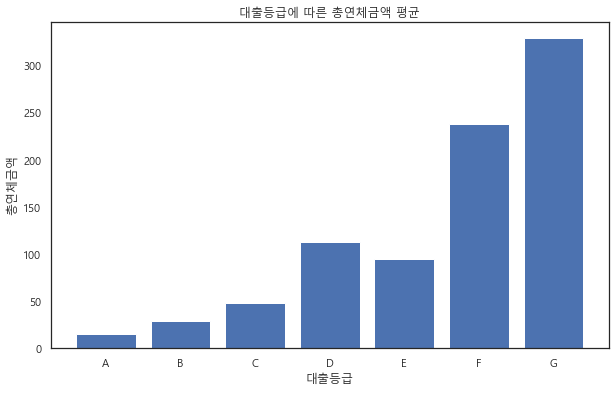

  대출등급     연체계좌수
0    A  0.001133
1    B  0.004789
2    C  0.007892
3    D  0.008462
4    E  0.007615
5    F  0.006653
6    G  0.004762


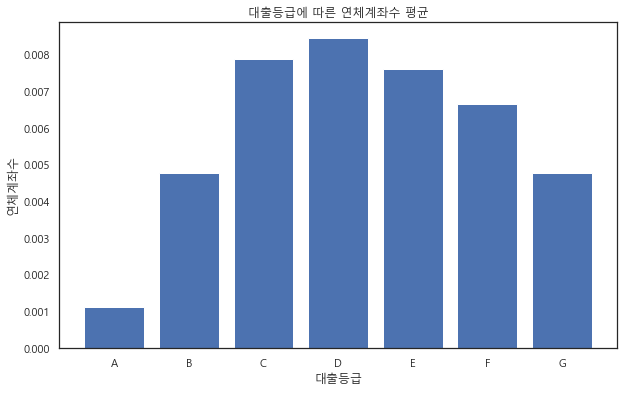

In [15]:
for var in numerical:
    eda_num_mean = train.groupby(['대출등급'])[var].mean().reset_index()
    print(eda_num_mean)
    plt.figure(figsize=(10, 6))
    plt.bar(eda_num_mean['대출등급'], eda_num_mean[var])
    plt.xlabel('대출등급')
    plt.ylabel(var)
    plt.title(f'대출등급에 따른 {var} 평균')
    plt.show()

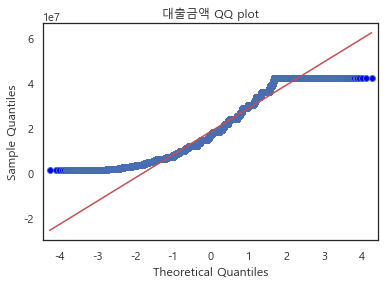

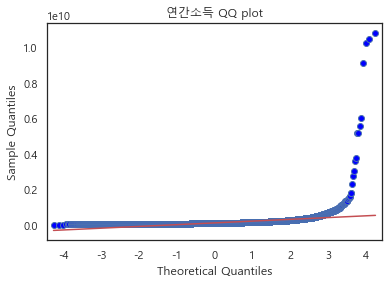

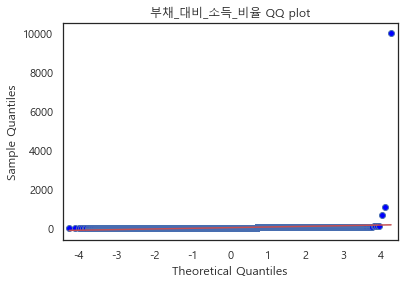

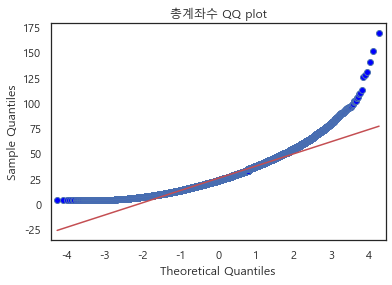

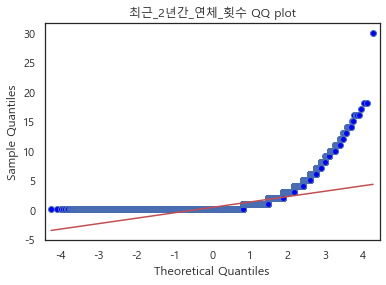

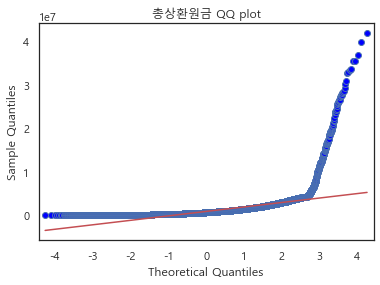

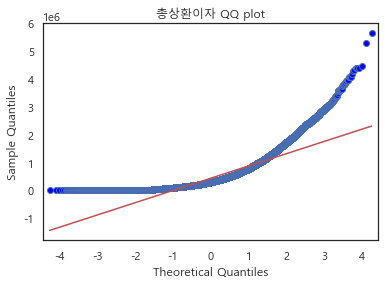

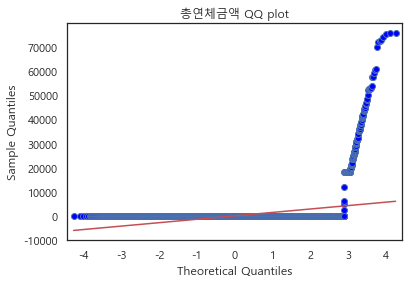

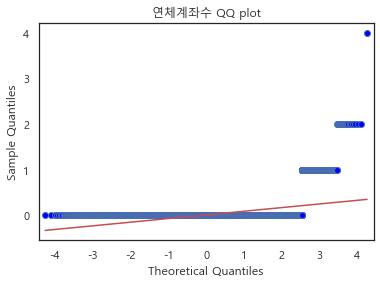

In [16]:
for var in numerical:
    qq = train[var]
    sm.qqplot(qq, line='s')
    plt.title(var +' QQ plot')

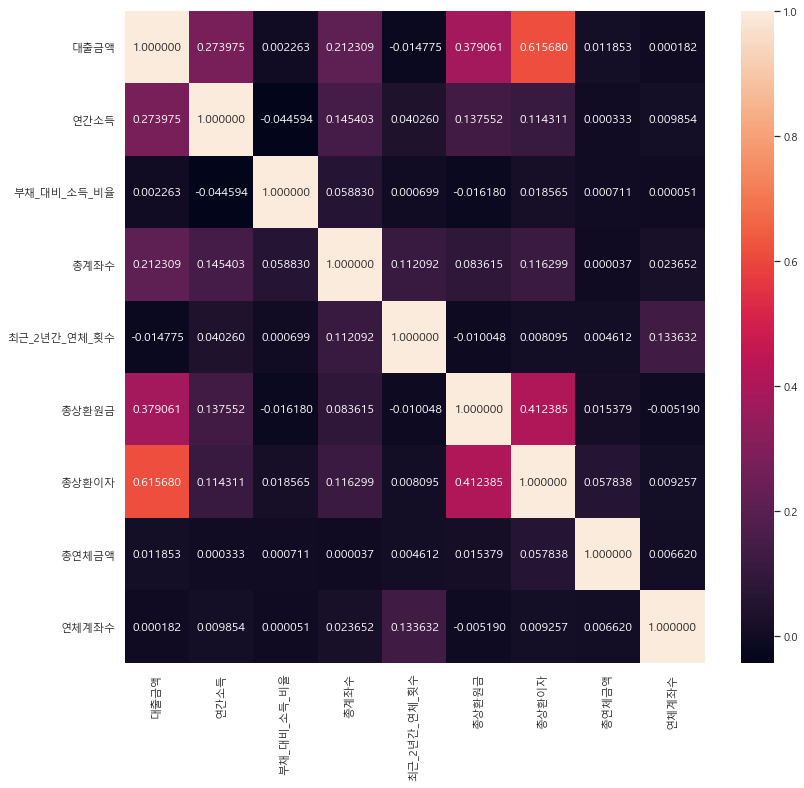

In [30]:
corr = train.corr()
plt.figure(figsize=(13,12))
sns.heatmap(corr, annot=True, fmt='f')
plt.show()

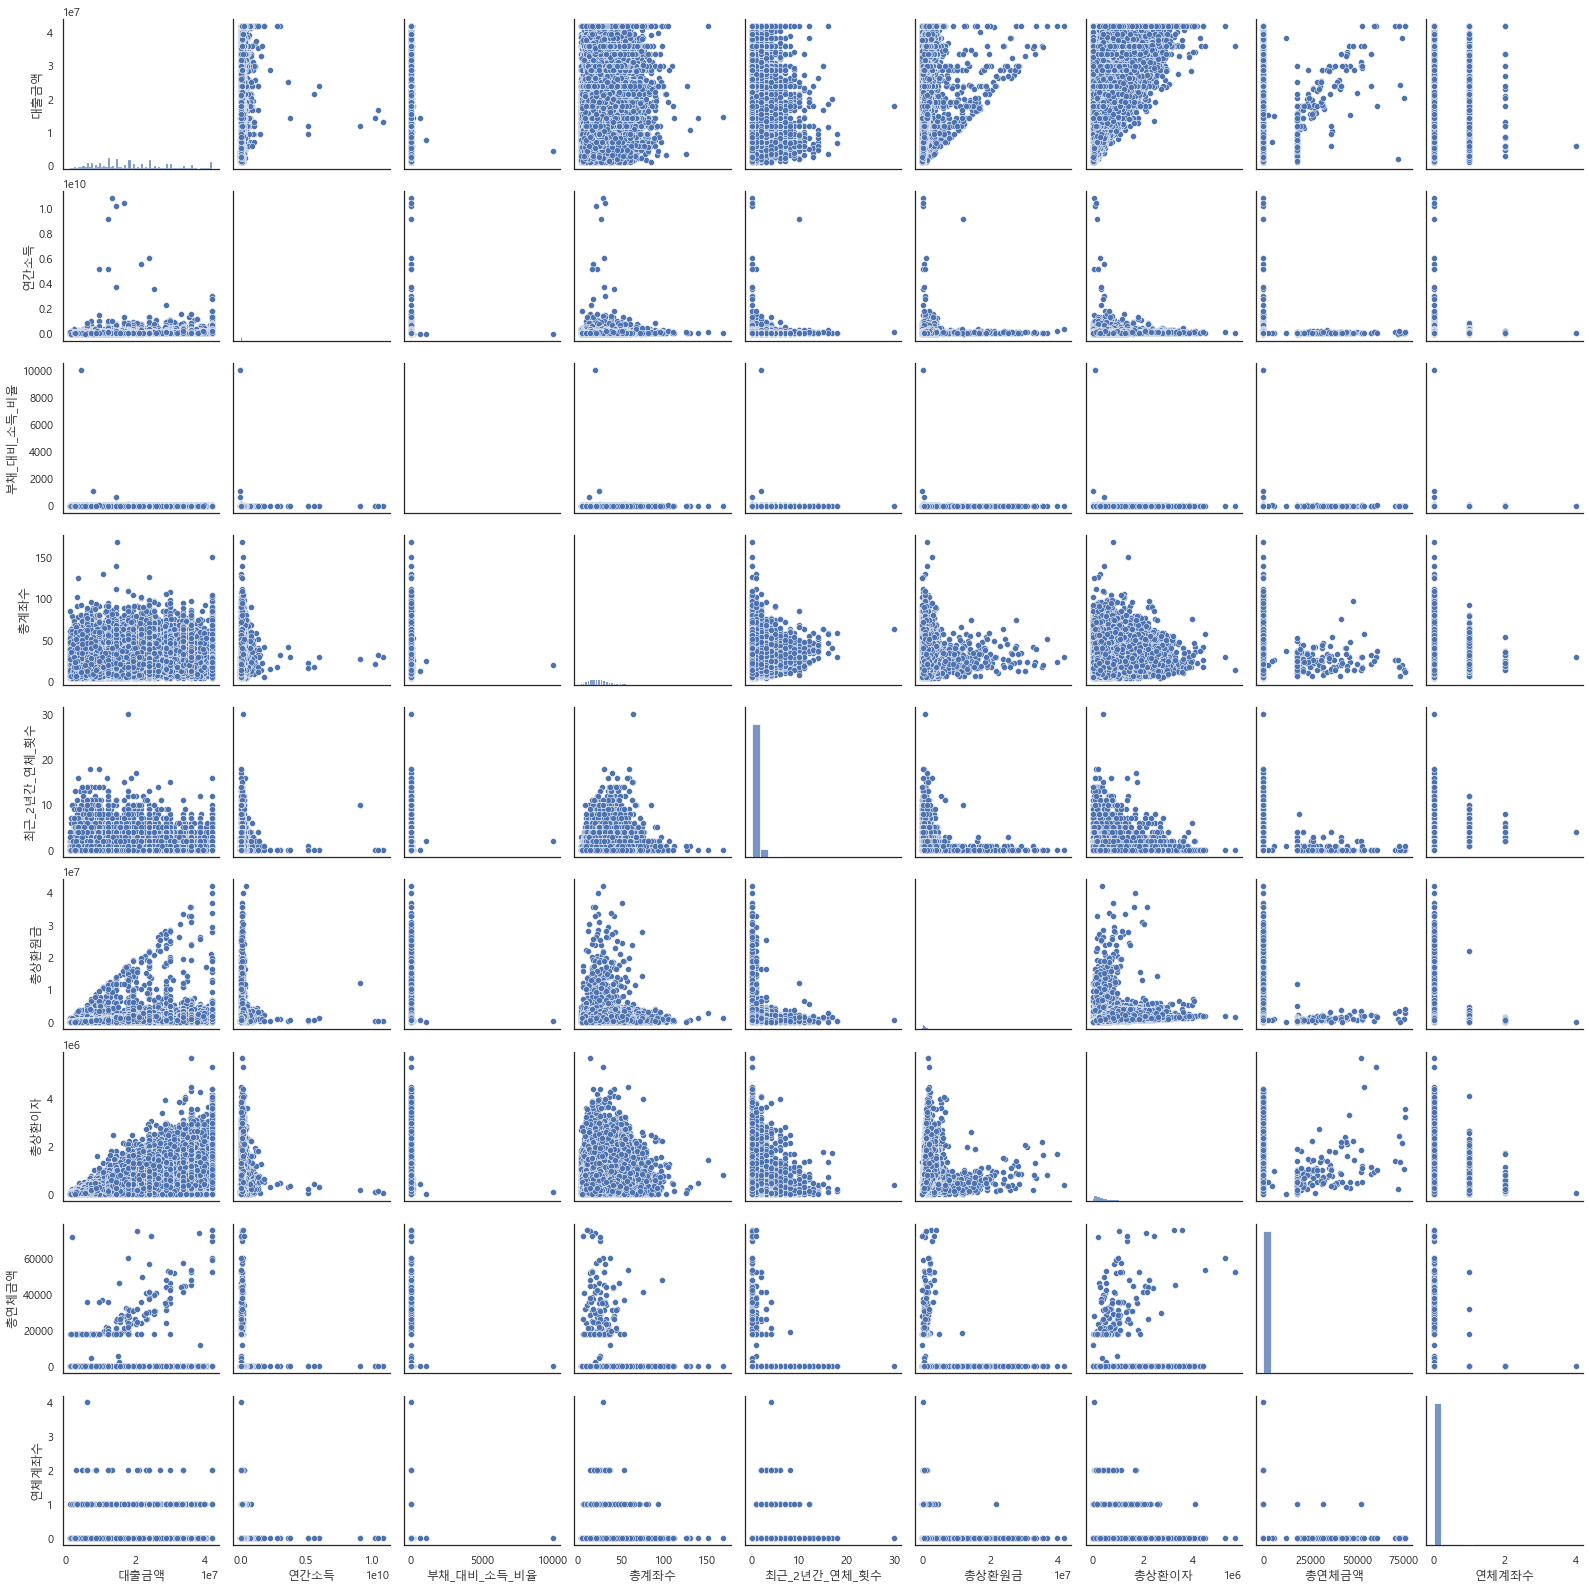

In [32]:
sns.pairplot(train)